# Filtering concept

Since last time we talked about images that could be though of as a function of two 2D position like <code>**I(x,y)**</code>. Or 2D array as we would say <code>**f(i,j)**</code>:

<br>
(i -row, j-col)
<br>



Last time we talked about adding noise function to an image <code>**f(x,y) = f(x,y) + n(x,y)**</code>. <br>
Remember from previous lesson that we have to worry about the size of sigma in respect to the range of the image, so if your image is 0 to 255, sigma of 5 might be plausible if your image goes 0 to 1, size of five would not work out very well. So we have to worry how those come together.

<br>
Now suppose there is a noise in your image and you want to get rid off it.
How might you think about doing that, any suggestions ?
<br>

Typically folks say lets replace the value of each pixel with sort of an average of the pixels around it. Ok, sound pretty solid, right ?
Lets look at in 1D.

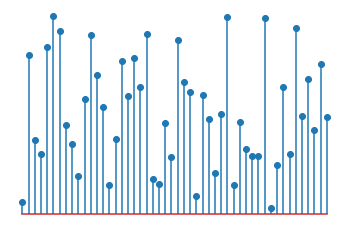

[0.05666808 0.76634351 0.35841957 0.29067288 0.80896681 0.95578518
 0.886455   0.42778435 0.33711351 0.18550898 0.55738553 0.86409802
 0.67092384 0.51573381 0.13923774 0.36181487 0.74075212 0.57077532
 0.75516702 0.61607148 0.86899497 0.1710181  0.14696495 0.44140445
 0.276685   0.83868936 0.63662416 0.58884699 0.084939   0.57264077
 0.45677932 0.19941967 0.4813052  0.94981859 0.14010723 0.4433226
 0.31618358 0.27766613 0.27887493 0.94649205 0.02824271 0.23802132
 0.6123051  0.28851336 0.8976594  0.47267228 0.6539008  0.40467903
 0.72677741 0.46813722]


In [59]:
import matplotlib.pyplot as plt
import numpy as np
import random

a = 50
n = np.arange(a);
dt = 0.07/50
# x = np.sin(2 * np.pi * 50 * n * dt)
x = np.random.uniform(0,1,a)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.stem(n, x, use_line_collection=True);
plt.show()
print(x)

Replace each pixel with an average of all the values in its neighborhood - it is refered as a moving average. We have some locations and we take the average and put it in another sequance. And then move and take average value, move again ant take average value. And eventually we will produce this new somewhat smoothed version of the original.

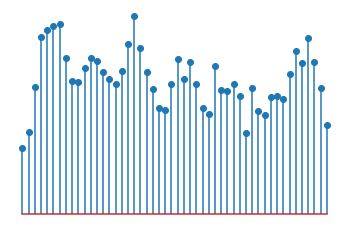

In [83]:
box = 5
def ma(interval, size):
    window= np.ones(int(size))/float(size)
    return np.convolve(interval, window, 'same')

x_av = ma(x, box)

plt.box(False)
plt.xticks([])
plt.yticks([])
plt.stem(n, x_av, use_line_collection=True);
plt.show()

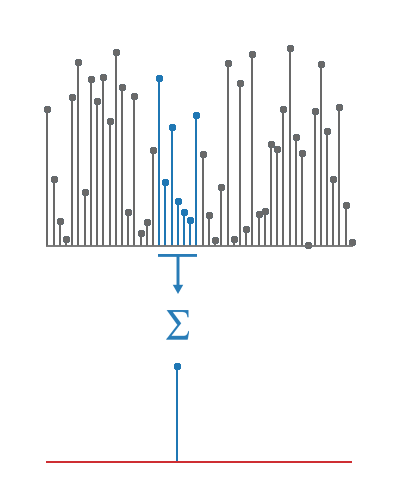

## Averaging Assumptions

Well that wasn't rockets science. And the important question to ask is why that soliution is intuitive for some of us ?
What assumptions are you making about pictures and noise it concluding the answer ?

 * <code>**Key assumtions**</code>:
    * The "true" value of pixels are similar to the true value of pixels nearby and the more nearby you are the more related you are. Otherwise why would we use the pixels nearby in order to try to figure out what real value was.
    * The noise added to each pixel is done independently. Basically we asume that each noise that's been addded to each pixel is independent of the noise that's been added to all the other pixels. And that means if i take the average of the noise, thas going to tend to be zero. That is sometimes it'll be up and sometimes it'll be down and if average taken around tem that will be zero


So if i have pixel nearby having about the same value and they are in that way related and the noise is independent, the averae is the right thing to do.

## Practise execise

If noise is just a function added to an image, we could remove the noise by substracting the noise again, like reversable operation:<br>

<code>**a)**</code> True;
<br>
<code>**b)**</code> True but we don't know the noise function so we can't actually do the subtraction;
<br>
<code>**b)**</code> False. Additive noise destroys information in the image and there is no way to recover it.

## Weighted Moving Average

Let's revisit our weighted average. So instead of just thinking about averaging local pixels, let's thing of this as a set of weights. And we are going to weight all these pixel by some set of weights and we will combine them using those weights to come up with the new value. Let's say that we average five pixels so its five long, then weights will be five 1/5 , uniformly distributed - <code>**[1, 1, 1, 1, 1] / 5**</code>. But does that make sense if our nearby pixels are related to my value and the more nearby you are the more related you are. So that means <code>**that pixesl that are closer to me should contribute more to the average**</code>. So le's change our moving average so that would be true - <code>**[1, 4, 6, 4, 1] / 16**</code> to non uniform set.

In [95]:
box = 5
weights = [x / 16 for x in [1, 4, 6, 4, 1]]
#def ma(interval):
    #return np.average(interval, axis=0, weights=weights)

#x_av = ma(x)

# plt.box(False)
# plt.xticks([])
# plt.yticks([])
# plt.stem(n, x_av, use_line_collection=True);
# plt.show()

## Practise execise

To do the moving average computation the number of weights should be:<br>

<code>**a)**</code>Odd (Liet. red.  nelyginis) - makes it easier to have a middle pixel;
<br>
<code>**b)**</code>Event(Liet. red.  lyginiai) = tat way the filter can be exactly symmetric around a pixel;
<br>
<code>**c)**</code> Either even or odd.

## Moving average in 2D

What about images , they are 2 dimensipnal and doing this in 2D is straight forward extension of 1D with a little bit of a flip.
Let say we have a image that is in range from 0(black) to 90(white). Yellow rectangle is our 3x3 average and we average the middle pixel, and lets move our average square over one step. And keep doing that until entire image pixels are total averaged values.

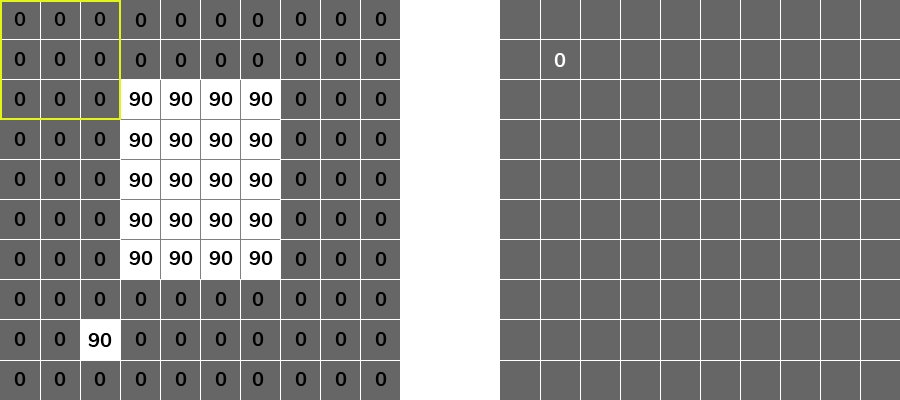

So the math what we just did is refered to as correlation or correlation filtering and we did it with uniform weights.
Assume our <code>**averaging windows is size 2k+1 by 2k+1**</code> remember it's odd. If k were 3 then that would be 7 by 7.
So we are going to loop over all of our pixels around some location F(i,j), i and j being the row and column. And we loop over all the u's and v's going from minus k to plus k, summing up all of the pixels. And then since we have the uniform weight, basically weight of 1 we divide the whole thing by the number of weights in the filter. So if the k was 1, would be 1/9. 

$$G[i, j] = \frac{1}{(2k+1)^2} \sum\limits_{u =-k}^{k} \sum\limits_{v =-k}^{k} F[i + u, j + v]$$

</br>

But thats uniform weights and nothing looks good in uniform. So let's do a corellation filtering with<code>**non-uniform weights**</code> And that means instead of having: 
<br>

$$\frac{1}{(2k+1)^2}$$
<br>

We will have a different  non-uniformal weight at each location overhere: 
<br>

$$H[u, v]$$
<br>
Those are simply tje weights tat you're going to still sum over the whole thing, but now these different will be apllied around inside that mask.
<br>

$$G[i, j] = \sum\limits_{u =-k}^{k} \sum\limits_{v =-k}^{k} H[u, v] F[i + u, j + v]$$
<br>

This is also in litarature called cross corelation, denoted:
$$ G = H \bigotimes F $$
<br>

So this H is reffered by many names<code>**kernel, mask, coefficients**</code>. But its just the matrix of the linear weights that get used.

## Averaging filter

What is good kernel. Consider a uniform averaging filter. It was just this <code>**box filter**</code> of all 1/9 and we moved it around we took this image on the left and created this image on the right.

$$ F(x, y)  \bigotimes H(u, v) = G(x, y) $$
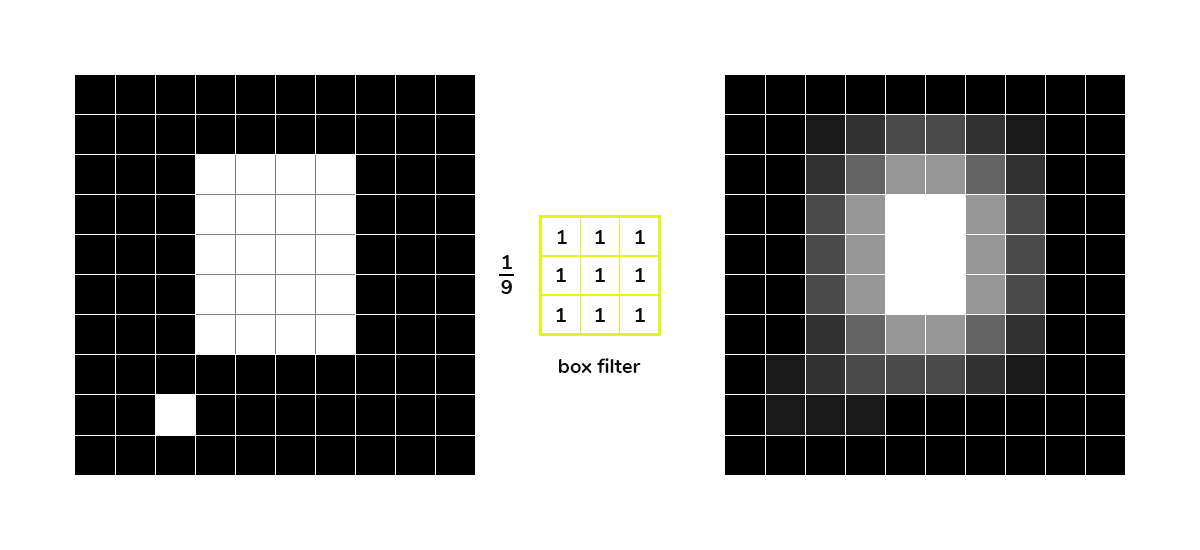

### Smoothing by box averaging

What uf we had some image like this below and applied that box filter.

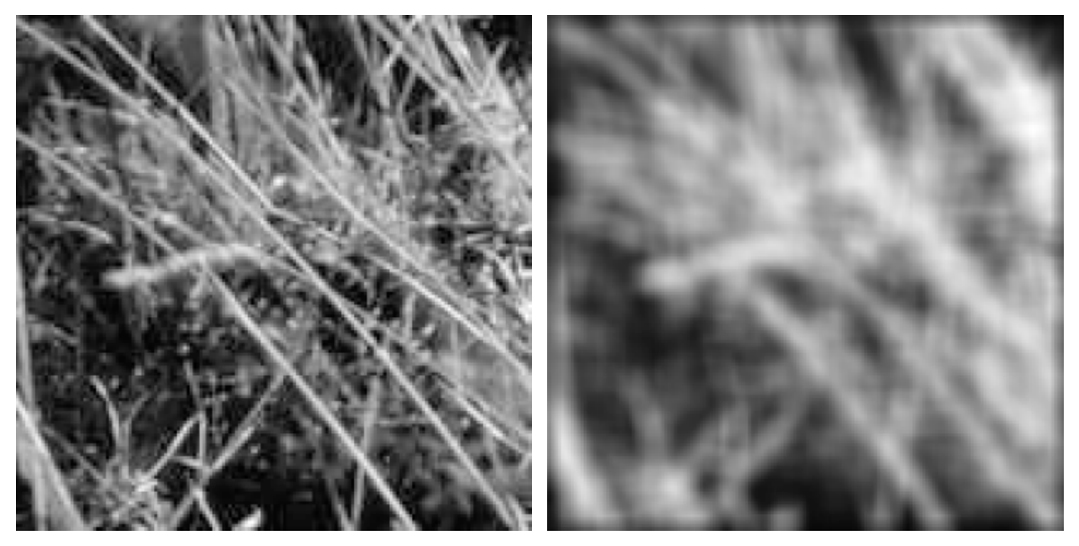

This is basicaly filtering with something that's not smooth. And sonn we'll be able to say more about whatss smooth in terms of mathematics in few more lectures when we will go throufh fourier analysis. But what went wrong with this image filtering. To get sense image that you had a single point of light that you're looking at very far away.  And you have blurred the camera so it was out of focus. It would like something like this, brighter in the middle, falling off towards blackness at the edges.
And if think of images as functions, we can take this image and plot it as a function.

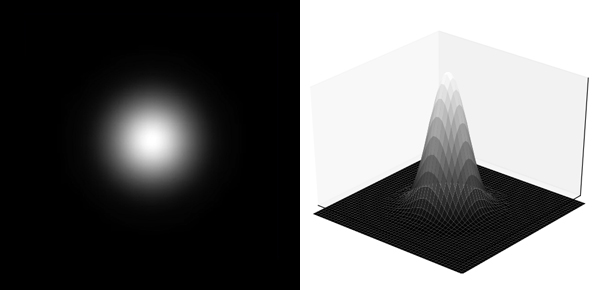

## Practise exercise

To blur a single pixel into a "blurry" spot we would need to filter the spot with a:
<br>
<code>**a)**</code> 3x3 square of uniform weights;
<br>
<code>**b)**</code> 11x11 square of uniform weights would be better since it's bigger.
<br>
<code>**b)**</code> Something that looks like a blurry spot with higher values in the middle, falling off to the edges.

## Gaussian filter

<code>**Nearest neighboring pixels have the most influence**</code>. A.k.a Removes high-frequency components from the image <code>**(low-pass filter)**</code>.

Here is our original image and our filter. And it not great gaussian because its only 3x3. Its higher at the middle and then falls off at the edges and even more at the corners. And that's sort of low coarse representation of gaussian function. This is the 2D gaussian in the u,v. That's a circularly symmetric gaussian function. 

$$h[u, v]=\frac{1}{2\pi\sigma^{2}}e^{-\frac{u^2 + v^2}{\sigma^2}} $$

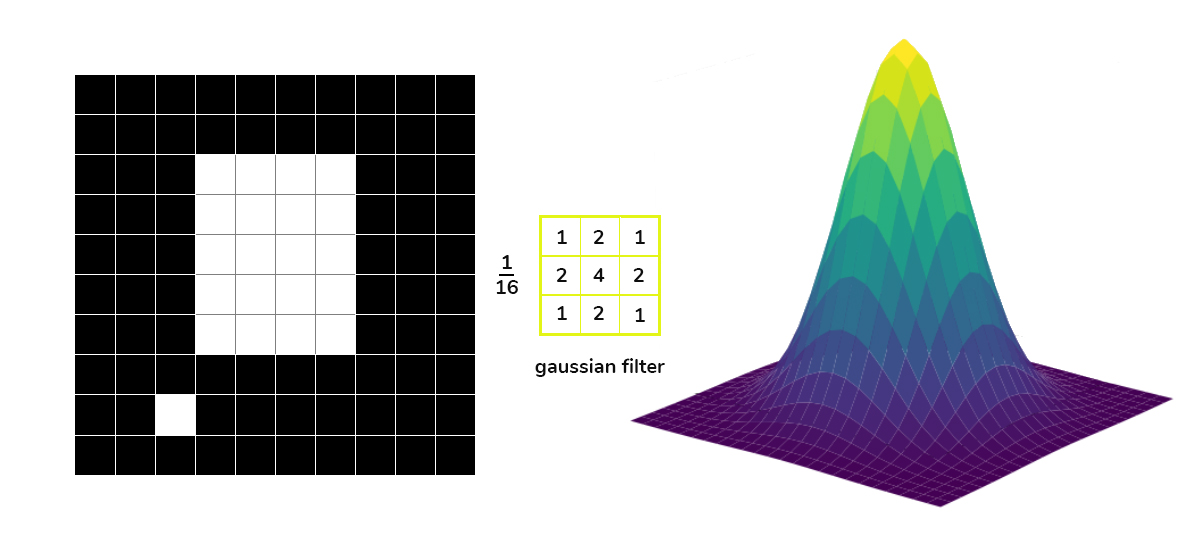

<IPython.core.display.Javascript object>


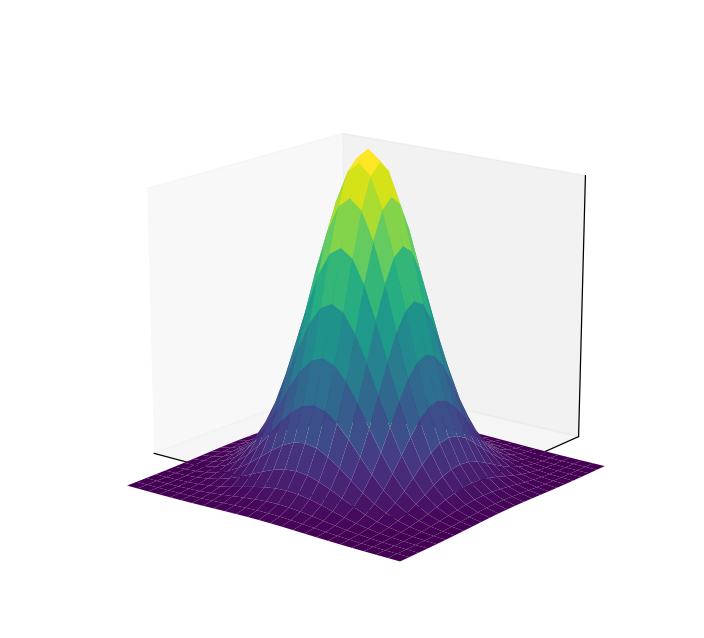

In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
mu_y = 0
variance_x = 10
variance_y = 10


x = np.linspace(-10,10,25)
y = np.linspace(-10,10,25)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_aspect("auto")
ax.set_autoscale_on(True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()

## An Isotropic Gaussian

Isostropic just a fancy word for circular. 

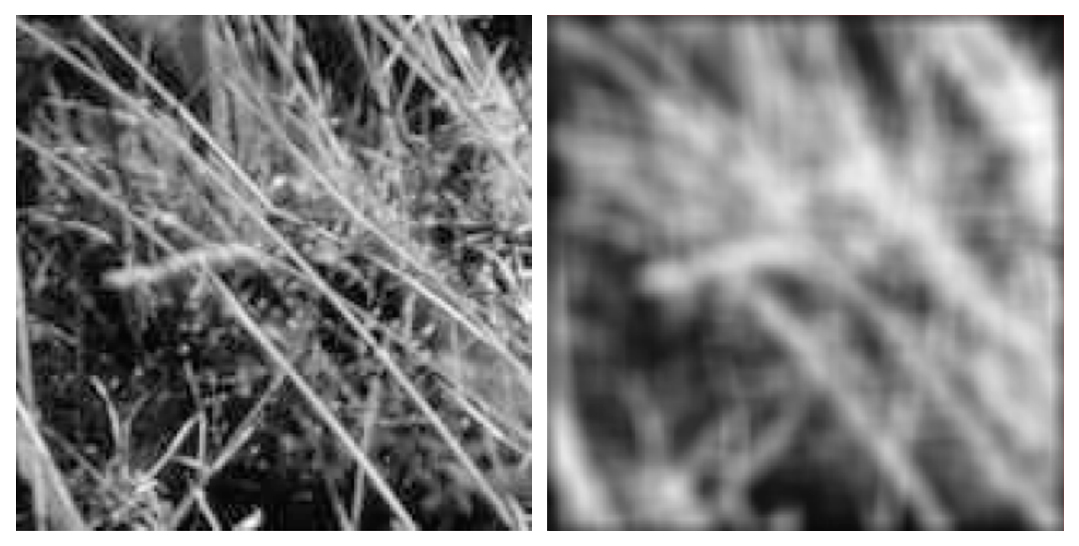

## Draft (juodraštis) 

In [53]:
N = 1
cumsum, moving_aves = [0], []
for i, x in enumerate(np.ravel(x), 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
        print(moving_ave)
  

def ma(data, width):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum_vec[width:] - cumsum_vec[:-width]) / width



0.13053384262977297
